In [1478]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline,make_pipeline

In [1476]:
df=pd.read_csv(r"C:\Users\user\Downloads\Smartphones_cleaned_dataset.csv")
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [1301]:
df.shape

(980, 26)

In [1302]:
df.isnull().mean()

brand_name                   0.000000
model                        0.000000
price                        0.000000
rating                       0.103061
has_5g                       0.000000
has_nfc                      0.000000
has_ir_blaster               0.000000
processor_brand              0.020408
num_cores                    0.006122
processor_speed              0.042857
battery_capacity             0.011224
fast_charging_available      0.000000
fast_charging                0.215306
ram_capacity                 0.000000
internal_memory              0.000000
screen_size                  0.000000
refresh_rate                 0.000000
num_rear_cameras             0.000000
num_front_cameras            0.004082
os                           0.014286
primary_camera_rear          0.000000
primary_camera_front         0.005102
extended_memory_available    0.000000
extended_upto                0.489796
resolution_width             0.000000
resolution_height            0.000000
dtype: float

C:\Users\user\AppData\Local\Temp\ipykernel_17332\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

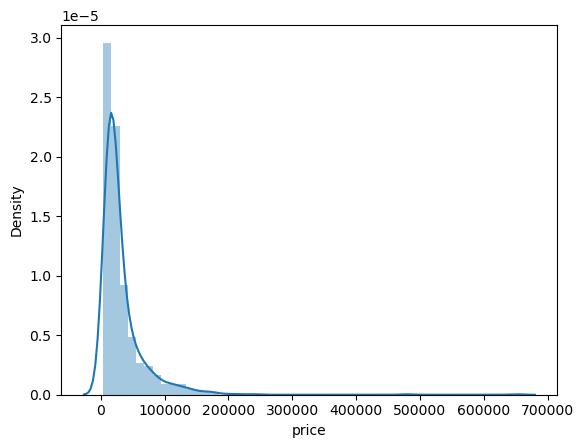

In [1303]:
sns.distplot(df['price'])

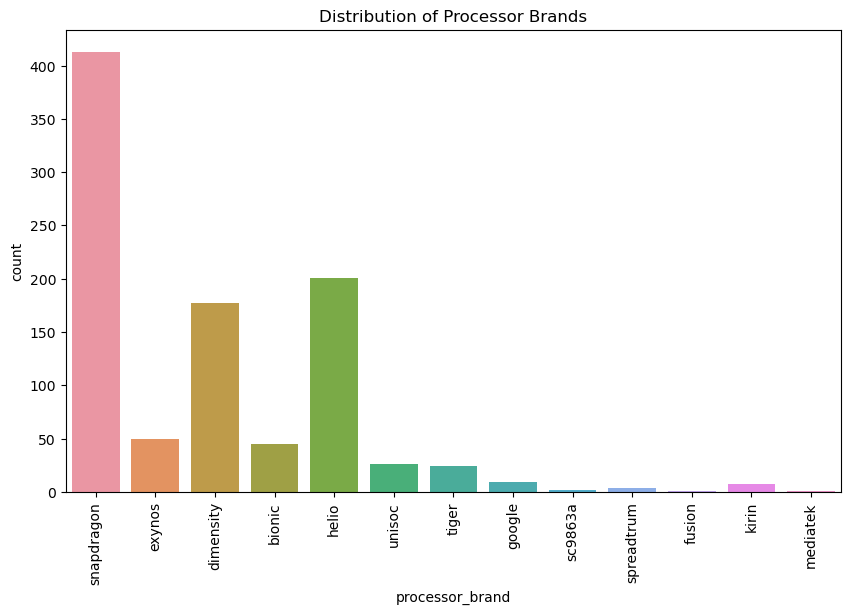

In [1304]:
plt.figure(figsize=(10, 6))
sns.countplot(x='processor_brand', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Processor Brands')
plt.show()


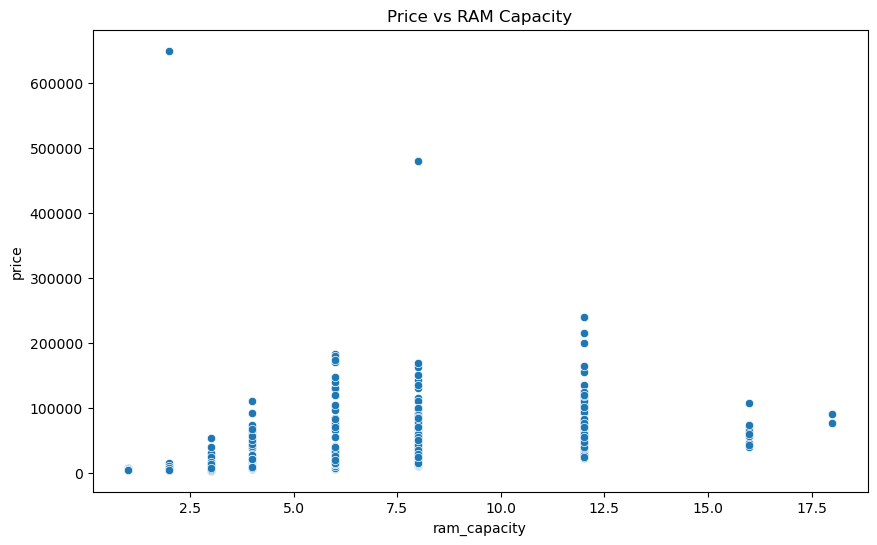

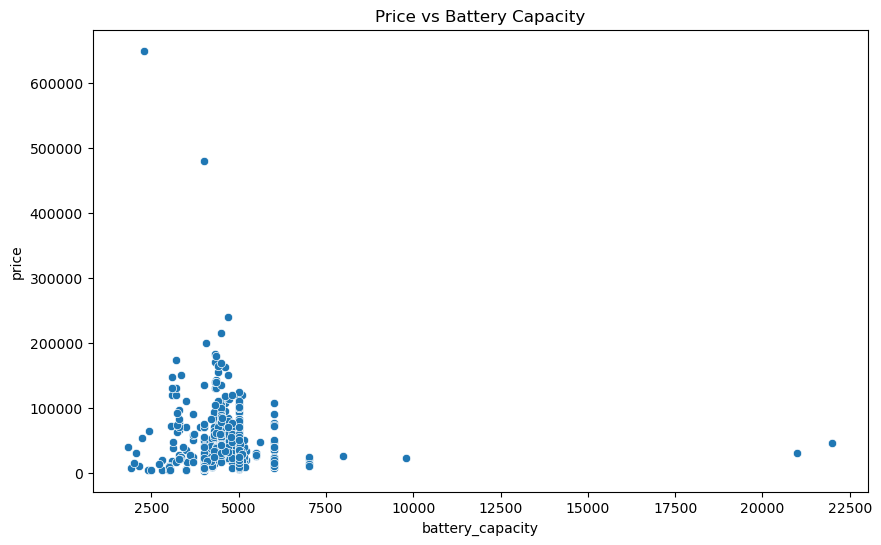

In [1305]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ram_capacity', y='price', data=df)
plt.title('Price vs RAM Capacity')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='battery_capacity', y='price', data=df)
plt.title('Price vs Battery Capacity')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_17332\908512954.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price'], shade=True)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


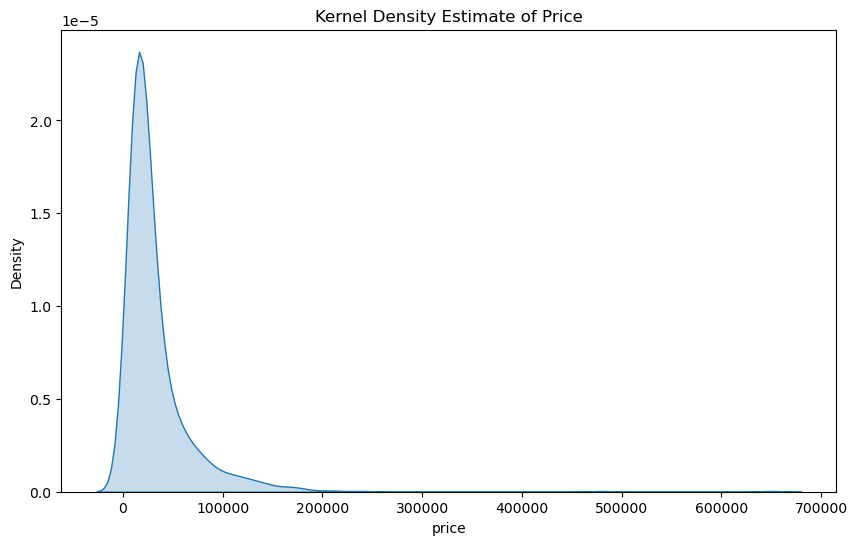

In [1306]:
# KDE Plot for price
plt.figure(figsize=(10, 6))
sns.kdeplot(df['price'], shade=True)
plt.title('Kernel Density Estimate of Price')
plt.show()


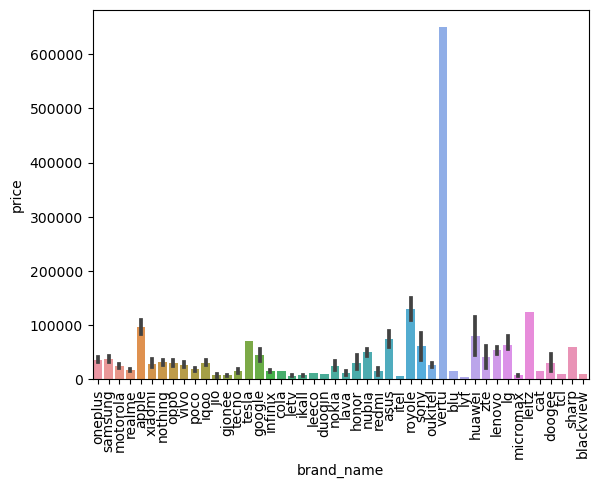

In [1307]:
sns.barplot(x=df['brand_name'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='has_5g', ylabel='price'>

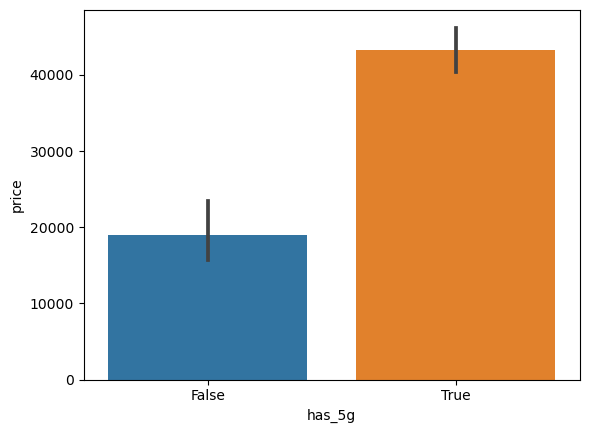

In [1308]:
sns.barplot(x=df['has_5g'],y=df['price'])

<Axes: xlabel='fast_charging_available', ylabel='price'>

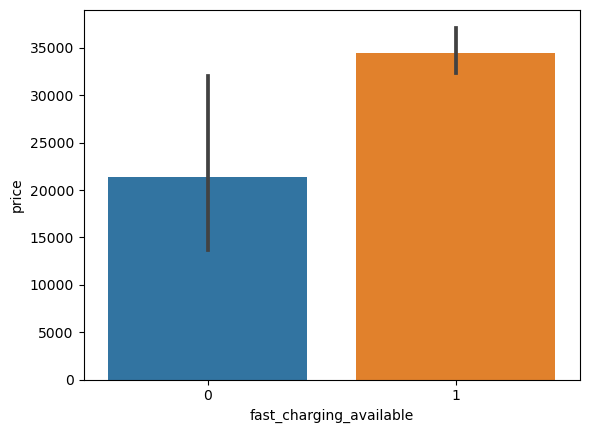

In [1309]:
sns.barplot(x=df['fast_charging_available'],y=df['price'])

<Axes: xlabel='num_front_cameras', ylabel='price'>

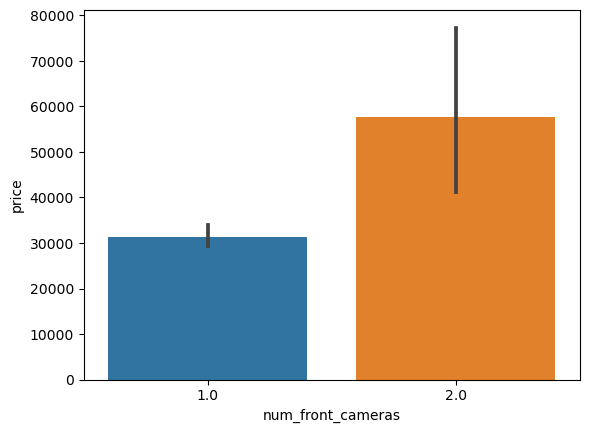

In [1310]:
sns.barplot(x=df['num_front_cameras'],y=df['price'])

In [1311]:
df['num_front_cameras'].value_counts()

num_front_cameras
1.0    947
2.0     29
Name: count, dtype: int64

In [1312]:
df['num_cores'].value_counts()

num_cores
8.0    899
6.0     39
4.0     36
Name: count, dtype: int64

In [1313]:
df['num_cores'].isnull().sum()

6

In [1314]:
df['fast_charging'].value_counts()

fast_charging
33.0     152
18.0     128
67.0      65
25.0      53
120.0     46
15.0      43
80.0      42
66.0      37
10.0      33
30.0      32
65.0      30
44.0      23
45.0      17
20.0      10
68.0       8
100.0      7
150.0      7
125.0      6
22.0       5
40.0       5
60.0       4
55.0       3
21.0       2
210.0      2
50.0       2
180.0      1
200.0      1
240.0      1
19.0       1
135.0      1
165.0      1
27.0       1
Name: count, dtype: int64

<Axes: xlabel='brand_name'>

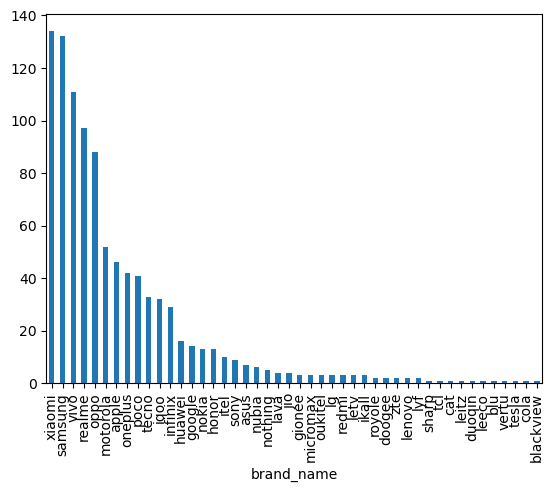

In [1315]:
df['brand_name'].value_counts().plot(kind='bar')


In [1316]:
df=df.drop(columns=['extended_upto'])

In [1317]:
df.select_dtypes(include=np.number).drop(columns=['extended_memory_available','fast_charging_available','refresh_rate']).columns

Index(['price', 'rating', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size',
       'num_rear_cameras', 'num_front_cameras', 'primary_camera_rear',
       'primary_camera_front', 'resolution_width', 'resolution_height'],
      dtype='object')

In [1318]:
for col in df.select_dtypes(include=np.number).drop(columns=['extended_memory_available','fast_charging_available','refresh_rate']).columns:
    print(df[col].value_counts())

price
14999    21
19990    17
11999    17
19999    16
16999    16
         ..
28994     1
48900     1
8890      1
18498     1
4787      1
Name: count, Length: 379, dtype: int64
rating
84.0    60
82.0    58
83.0    55
75.0    53
85.0    50
80.0    49
86.0    47
79.0    45
77.0    38
78.0    36
81.0    35
89.0    35
87.0    33
74.0    30
76.0    29
88.0    26
71.0    21
72.0    18
69.0    18
73.0    16
66.0    15
61.0    15
65.0    14
70.0    14
68.0    13
67.0    13
60.0    12
62.0    11
64.0    10
63.0    10
Name: count, dtype: int64
num_cores
8.0    899
6.0     39
4.0     36
Name: count, dtype: int64
processor_speed
2.00    146
2.20    135
2.40    128
3.20     94
2.30     86
3.00     53
2.84     36
2.05     28
2.50     23
1.80     23
1.60     20
2.85     19
3.22     18
3.10     15
2.60     14
2.90     13
1.30     10
1.82     10
2.73      9
2.80      9
3.05      8
2.36      8
1.40      5
2.65      5
2.70      5
1.50      4
2.96      3
2.86      3
3.13      2
2.35      1
2.37      1
1.9

In [1474]:
for cols in ['price','rating','primary_camera_rear','battery_capacity']:
    if abs(df[cols].skew())>=0.8:
        upper_value=df[cols].quantile(0.75)
        lower_value=df[cols].quantile(0.25)
        df=df.copy()
        df[cols]=np.where(df[cols]>upper_value,
                    upper_value,
                    np.where(df[cols]<lower_value,
                             lower_value,
                             df[cols]))

In [1320]:
df['primary_camera_rear'].skew()

-0.5565599445724924

In [1321]:
X = df.drop(columns=['price'])
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train.columns

Index(['brand_name', 'model', 'rating', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'resolution_width',
       'resolution_height'],
      dtype='object')

In [1322]:
cols=[var for var in df.columns if df[var].isnull().mean()*100<=5 and df[var].isnull().mean()*100>0]

In [1323]:
cols

['processor_brand',
 'num_cores',
 'processor_speed',
 'battery_capacity',
 'num_front_cameras',
 'os',
 'primary_camera_front']

In [1324]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'resolution_width',
       'resolution_height'],
      dtype='object')

In [1346]:
imputer1=SimpleImputer(strategy='most_frequent')
imputer2=SimpleImputer()
imputer3=SimpleImputer()
imputer4=SimpleImputer()
imputer5=SimpleImputer(strategy='most_frequent')
imputer6=SimpleImputer()
imputer7=SimpleImputer()
imputer8=SimpleImputer(strategy='most_frequent')
imputer9=SimpleImputer(strategy='most_frequent')

In [1348]:
trf=ColumnTransformer([('imputer1',imputer1,['processor_brand']),('imputer2',imputer2,['num_cores']),('imputer3',imputer3,['processor_speed']),
                       ('imputer4',imputer4,['battery_capacity']),('imputer5',imputer5,['os']),('imputer6',imputer6,['primary_camera_front']), 
                       ('imputer7',imputer7,['num_front_cameras']),('imputer8',imputer8,['rating']),('imputer9',imputer9,['fast_charging'])],
                      remainder='passthrough')

In [1350]:
X_train=trf.fit_transform(x_train)
X_test=trf.transform(x_test)
feature_names = trf.get_feature_names_out()
X_train=pd.DataFrame(X_train,columns=feature_names)
X_test=pd.DataFrame(X_test,columns=feature_names)
feature_names


array(['imputer1__processor_brand', 'imputer2__num_cores',
       'imputer3__processor_speed', 'imputer4__battery_capacity',
       'imputer5__os', 'imputer6__primary_camera_front',
       'imputer7__num_front_cameras', 'imputer8__rating',
       'imputer9__fast_charging', 'remainder__brand_name',
       'remainder__model', 'remainder__has_5g', 'remainder__has_nfc',
       'remainder__has_ir_blaster', 'remainder__fast_charging_available',
       'remainder__ram_capacity', 'remainder__internal_memory',
       'remainder__screen_size', 'remainder__refresh_rate',
       'remainder__num_rear_cameras', 'remainder__primary_camera_rear',
       'remainder__extended_memory_available',
       'remainder__resolution_width', 'remainder__resolution_height'],
      dtype=object)

In [1352]:
X_train.head()

,imputer1__processor_brand,imputer2__num_cores,imputer3__processor_speed,imputer4__battery_capacity,imputer5__os,imputer6__primary_camera_front,imputer7__num_front_cameras,imputer8__rating,imputer9__fast_charging,remainder__brand_name,...,remainder__fast_charging_available,remainder__ram_capacity,remainder__internal_memory,remainder__screen_size,remainder__refresh_rate,remainder__num_rear_cameras,remainder__primary_camera_rear,remainder__extended_memory_available,remainder__resolution_width,remainder__resolution_height
0,snapdragon,8.0,2.84,4500.0,android,8.0,1.0,86.0,21.0,sony,...,1,8,128,6.1,120,3,24.0,1,1080,2520
1,snapdragon,8.0,3.2,4800.0,android,32.0,1.0,84.0,66.0,vivo,...,1,12,256,8.03,120,3,50.0,0,1916,2160
2,dimensity,8.0,2.2,5000.0,android,5.0,1.0,70.0,15.0,vivo,...,1,4,128,6.51,60,2,24.0,1,720,1600
3,dimensity,8.0,2.2,5000.0,android,8.0,1.0,79.0,15.0,samsung,...,1,6,128,6.6,90,3,48.0,1,1080,2408
4,bionic,6.0,2.65,4500.0,ios,12.0,1.0,73.0,33.0,apple,...,0,4,64,6.1,60,2,24.0,0,828,1792


In [1354]:
df['num_cores'].sample()

953    8.0
Name: num_cores, dtype: float64

<Axes: ylabel='Density'>

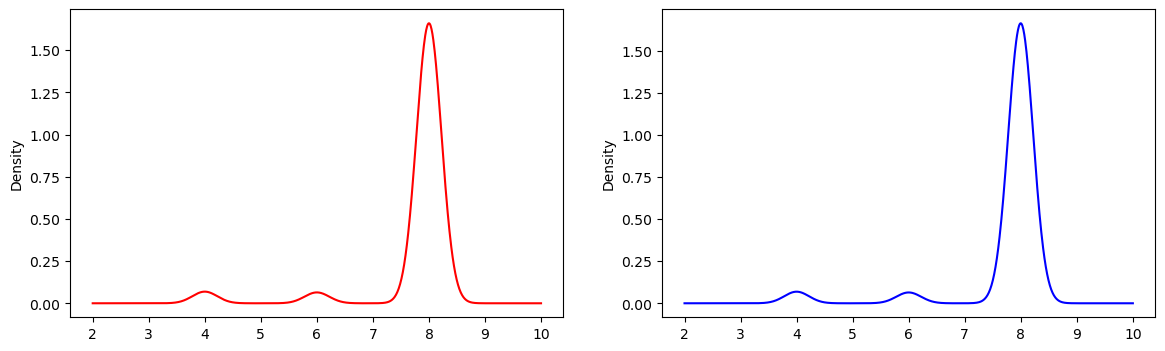

In [1356]:
fig=plt.figure(figsize=(14,4))
ax1=fig.add_subplot(121)
x_train['num_cores'].plot.density(color='r')
ax2=fig.add_subplot(122)
X_train['imputer2__num_cores'].plot.density(color='b')

<Axes: ylabel='Density'>

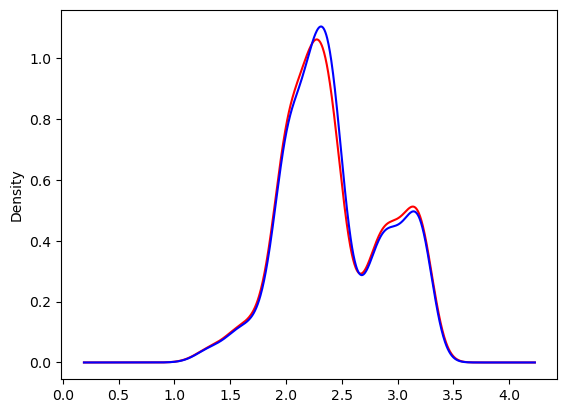

In [1358]:
fig=plt.figure()
ax1=fig.add_subplot(111)
x_train['processor_speed'].plot.density(color='r')
X_train['imputer3__processor_speed'].plot.density(color='b')

<Axes: ylabel='Density'>

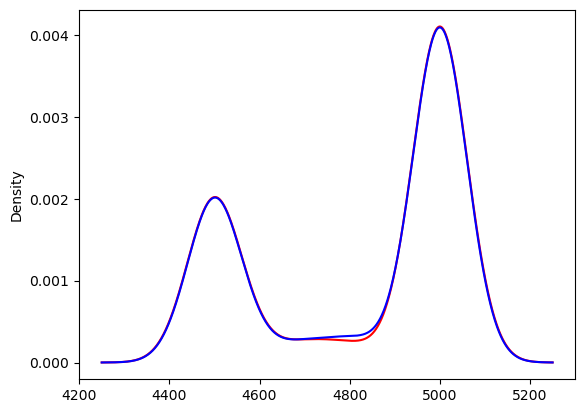

In [1360]:
fig=plt.figure()
ax=fig.add_subplot(111)
x_train['battery_capacity'].plot.density(color='r')
X_train['imputer4__battery_capacity'].plot.density(color='b')

<Axes: ylabel='Density'>

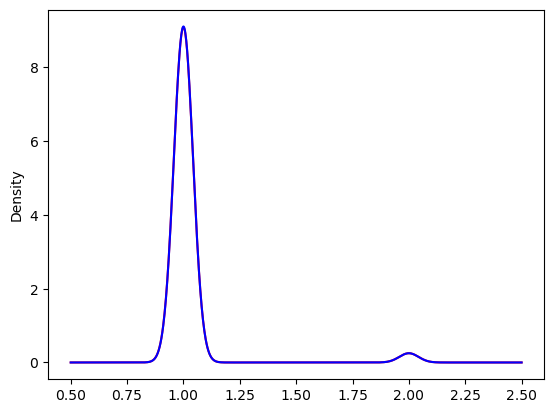

In [1361]:
fig=plt.figure()
ax=fig.add_subplot(111)
x_train['num_front_cameras'].plot.density(color='r')
X_train['imputer7__num_front_cameras'].plot.density(color='b')

<Axes: ylabel='Density'>

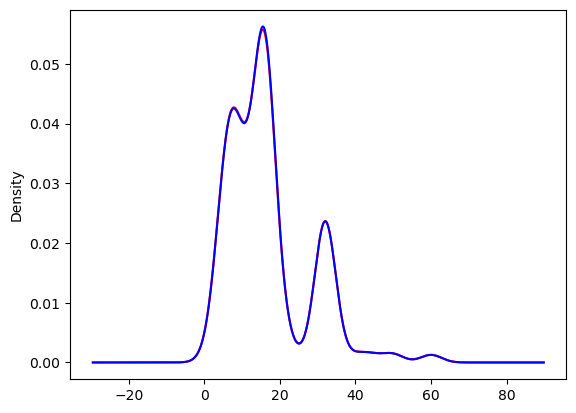

In [1363]:
fig=plt.figure()
ax=fig.add_subplot(111)
x_train['primary_camera_front'].plot.density(color='r')
X_train['imputer6__primary_camera_front'].plot.density(color='b')

In [1365]:
X_train.isnull().mean()

imputer1__processor_brand               0.0
imputer2__num_cores                     0.0
imputer3__processor_speed               0.0
imputer4__battery_capacity              0.0
imputer5__os                            0.0
imputer6__primary_camera_front          0.0
imputer7__num_front_cameras             0.0
imputer8__rating                        0.0
imputer9__fast_charging                 0.0
remainder__brand_name                   0.0
remainder__model                        0.0
remainder__has_5g                       0.0
remainder__has_nfc                      0.0
remainder__has_ir_blaster               0.0
remainder__fast_charging_available      0.0
remainder__ram_capacity                 0.0
remainder__internal_memory              0.0
remainder__screen_size                  0.0
remainder__refresh_rate                 0.0
remainder__num_rear_cameras             0.0
remainder__primary_camera_rear          0.0
remainder__extended_memory_available    0.0
remainder__resolution_width     

In [1368]:
X_test.isnull().mean()

imputer1__processor_brand               0.0
imputer2__num_cores                     0.0
imputer3__processor_speed               0.0
imputer4__battery_capacity              0.0
imputer5__os                            0.0
imputer6__primary_camera_front          0.0
imputer7__num_front_cameras             0.0
imputer8__rating                        0.0
imputer9__fast_charging                 0.0
remainder__brand_name                   0.0
remainder__model                        0.0
remainder__has_5g                       0.0
remainder__has_nfc                      0.0
remainder__has_ir_blaster               0.0
remainder__fast_charging_available      0.0
remainder__ram_capacity                 0.0
remainder__internal_memory              0.0
remainder__screen_size                  0.0
remainder__refresh_rate                 0.0
remainder__num_rear_cameras             0.0
remainder__primary_camera_rear          0.0
remainder__extended_memory_available    0.0
remainder__resolution_width     

<Axes: ylabel='Density'>

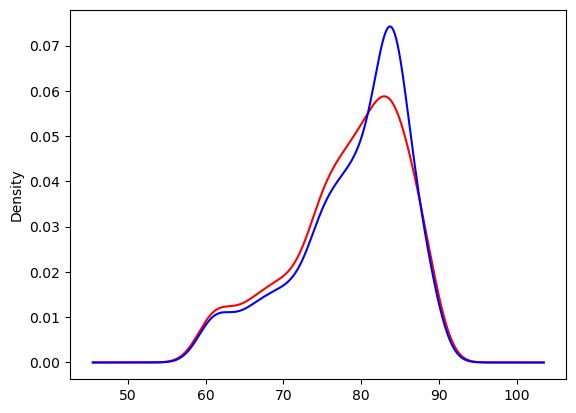

In [1370]:
fig=plt.figure()
ax=fig.add_subplot(111)
x_train['rating'].plot.density(color='r')
X_train['imputer8__rating'].plot.density(color='b')

<Axes: ylabel='Density'>

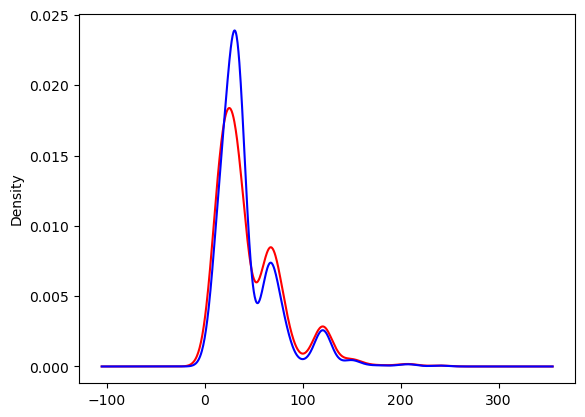

In [1371]:
fig=plt.figure()
ax=fig.add_subplot(111)
x_train['fast_charging'].plot.density(color='r')
X_train['imputer9__fast_charging'].plot.density(color='b')

In [1373]:
X_train=X_train.rename(columns={'imputer1__processor_brand':'processor_brand','imputer2__num_cores':'num_cores','imputer3__processor_speed':'processor_speed','imputer4__battery_capacity':'battery_capacity','imputer5__os':'os','imputer6__primary_camera_front':'primary_camera_front','imputer7__num_front_cameras':'num_front_cameras','imputer8__rating':'rating','imputer9__fast_charging':'fast_charging','remainder__brand_name':'brand_name','remainder__model':'model','remainder__has_5g':'has_5g','remainder__has_nfc':'has_nfc','remainder__has_ir_blaster':'has_ir_blaster','remainder__fast_charging_available':'fast_charging_available','remainder__ram_capacity':'ram_capacity','remainder__internal_memory':'internal_memory','remainder__screen_size':'screen_size','remainder__refresh_rate':'refresh_rate','remainder__num_rear_cameras':'num_rear_cameras','remainder__primary_camera_rear':'primary_camera_rear','remainder__extended_memory_available':'extended_memory_available','remainder__resolution_width':
'resolutution_width','remainder__resolution_height':'resolution_height'})

In [1374]:
X_test=X_test.rename(columns={'imputer1__processor_brand':'processor_brand','imputer2__num_cores':'num_cores','imputer3__processor_speed':'processor_speed','imputer4__battery_capacity':'battery_capacity','imputer5__os':'os','imputer6__primary_camera_front':'primary_camera_front','imputer7__num_front_cameras':'num_front_cameras','imputer8__rating':'rating','imputer9__fast_charging':'fast_charging','remainder__brand_name':'brand_name','remainder__model':'model','remainder__has_5g':'has_5g','remainder__has_nfc':'has_nfc','remainder__has_ir_blaster':'has_ir_blaster','remainder__fast_charging_available':'fast_charging_available','remainder__ram_capacity':'ram_capacity','remainder__internal_memory':'internal_memory','remainder__screen_size':'screen_size','remainder__refresh_rate':'refresh_rate','remainder__num_rear_cameras':'num_rear_cameras','remainder__primary_camera_rear':'primary_camera_rear','remainder__extended_memory_available':'extended_memory_available','remainder__resolution_width':
'resolutution_width','remainder__resolution_height':'resolution_height'})
                   

In [1378]:
X_train.head()

,processor_brand,num_cores,processor_speed,battery_capacity,os,primary_camera_front,num_front_cameras,rating,fast_charging,brand_name,...,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,extended_memory_available,resolutution_width,resolution_height
0,snapdragon,8.0,2.84,4500.0,android,8.0,1.0,86.0,21.0,sony,...,1,8,128,6.1,120,3,24.0,1,1080,2520
1,snapdragon,8.0,3.2,4800.0,android,32.0,1.0,84.0,66.0,vivo,...,1,12,256,8.03,120,3,50.0,0,1916,2160
2,dimensity,8.0,2.2,5000.0,android,5.0,1.0,70.0,15.0,vivo,...,1,4,128,6.51,60,2,24.0,1,720,1600
3,dimensity,8.0,2.2,5000.0,android,8.0,1.0,79.0,15.0,samsung,...,1,6,128,6.6,90,3,48.0,1,1080,2408
4,bionic,6.0,2.65,4500.0,ios,12.0,1.0,73.0,33.0,apple,...,0,4,64,6.1,60,2,24.0,0,828,1792


In [1380]:
X_train['processor_brand'].value_counts()

processor_brand
snapdragon    351
helio         155
dimensity     145
exynos         43
bionic         33
unisoc         24
tiger          18
google          7
kirin           3
spreadtrum      2
mediatek        1
fusion          1
sc9863a         1
Name: count, dtype: int64

In [1382]:
X_train['os'].value_counts()

os
android    742
ios         34
other        8
Name: count, dtype: int64

In [1384]:
x_train['model'].value_counts()

model
Sony Xperia 5 II                           1
Samsung Galaxy A23 5G (8GB RAM + 128GB)    1
Google Pixel 6A                            1
Samsung Galaxy F24 5G                      1
Xiaomi 13 Ultra 5G                         1
                                          ..
Oppo A78                                   1
itel P36                                   1
Samsung Galaxy F14                         1
Realme 10 Pro Plus (8GB RAM + 256GB)       1
Motorola Moto S30 Pro                      1
Name: count, Length: 784, dtype: int64

In [1386]:
X_train=X_train.drop(columns='model')
X_test=X_test.drop(columns='model')

In [1388]:
X_train['brand_name'].value_counts()

brand_name
xiaomi       108
samsung      102
vivo          89
realme        83
oppo          71
motorola      41
oneplus       36
poco          34
apple         34
tecno         25
iqoo          23
infinix       21
google        12
honor         11
huawei        10
nokia          9
itel           9
sony           8
asus           7
nubia          6
nothing        5
micromax       3
gionee         3
oukitel        3
redmi          2
jio            2
ikall          2
lenovo         2
lg             2
lyf            2
letv           2
doogee         2
lava           2
leeco          1
blu            1
blackview      1
cat            1
royole         1
duoqin         1
sharp          1
zte            1
leitz          1
tesla          1
tcl            1
vertu          1
cola           1
Name: count, dtype: int64

In [1390]:
X_train.columns

Index(['processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'os', 'primary_camera_front', 'num_front_cameras', 'rating',
       'fast_charging', 'brand_name', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'fast_charging_available', 'ram_capacity', 'internal_memory',
       'screen_size', 'refresh_rate', 'num_rear_cameras',
       'primary_camera_rear', 'extended_memory_available',
       'resolutution_width', 'resolution_height'],
      dtype='object')

In [1392]:
X_train[X_train.isnull().any(axis=1)]

,processor_brand,num_cores,processor_speed,battery_capacity,os,primary_camera_front,num_front_cameras,rating,fast_charging,brand_name,...,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,extended_memory_available,resolutution_width,resolution_height


In [1394]:
X_train['has_5g']

0       True
1       True
2       True
3       True
4      False
       ...  
779     True
780     True
781     True
782     True
783     True
Name: has_5g, Length: 784, dtype: object

In [1396]:
X_train['has_nfc']

0       True
1       True
2      False
3      False
4       True
       ...  
779    False
780     True
781    False
782     True
783    False
Name: has_nfc, Length: 784, dtype: object

In [1398]:
X_train['has_ir_blaster']

0      False
1      False
2      False
3      False
4      False
       ...  
779    False
780    False
781    False
782    False
783    False
Name: has_ir_blaster, Length: 784, dtype: object

In [1400]:
X_train['fast_charging_available']

0      1
1      1
2      1
3      1
4      0
      ..
779    1
780    1
781    1
782    0
783    1
Name: fast_charging_available, Length: 784, dtype: object

In [1404]:
X_train.columns

Index(['processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'os', 'primary_camera_front', 'num_front_cameras', 'rating',
       'fast_charging', 'brand_name', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'fast_charging_available', 'ram_capacity', 'internal_memory',
       'screen_size', 'refresh_rate', 'num_rear_cameras',
       'primary_camera_rear', 'extended_memory_available',
       'resolutution_width', 'resolution_height'],
      dtype='object')

In [1406]:
trf1=ColumnTransformer([('oe',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),[9,10,11])],
                       remainder='passthrough')

In [1408]:
trf2=ColumnTransformer([('ohe',OneHotEncoder(sparse_output=False, handle_unknown='ignore',min_frequency=30),[3,7,10])],
                       remainder='passthrough')

In [1426]:
trf3=ColumnTransformer([('scale',MinMaxScaler(),slice(0,46))])

In [1428]:
trf4= XGBRegressor(random_state=3)
trf5 = RandomForestRegressor(random_state=3)

In [1434]:
param_dist = {'trf4__n_estimators': [45, 60],'trf4__max_depth': [5, 7],'trf4__learning_rate': [0.3, 0.5],
    'trf5__n_estimators': [100, 150],'trf5__max_depth': [10, 15],'trf5__max_samples': [0.5, 0.75],'trf5__max_features': [0.75, 1.0]}


In [1458]:
voting_model = VotingRegressor([('trf4', trf4),('trf5',trf5)])
random_search = RandomizedSearchCV(estimator=voting_model,param_distributions=param_dist,n_iter=30,scoring='r2',cv=3,verbose=1,
                n_jobs=-1,random_state=42)
pipe = Pipeline([('trf1', trf1),('trf2', trf2),('trf3', trf3),('random_search',random_search)])

In [1460]:
pipe.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [9, 10, 11])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                min_frequency=30,
                                                                sparse_output=False),
                                                  [3, 7, 10])])),
                ('trf3',
                 ColumnTransfor...
                                                                                        num_parallel_tree=None, ...)),
                                                                          ('trf5',
                                                                           RandomForestRegressor(random_state=3))]),
                                    n_iter=30, n_jobs=-1,
                                    param_distributions={'trf4__learning_rate': [0.3,
                                                                                 0.5],
                                                         'trf4__max_depth': [5,
                                                                             7],
                                                         'trf4__n_estimators': [45,
                                                                                60],
                                                         'trf5__max_depth': [10,
                                                                             15],
                                                         'trf5__max_features': [0.75,
                                                                                1.0],
                                                         'trf5__max_samples': [0.5,
                                                                               0.75],
                                                         'trf5__n_estimators': [100,
                                                                                150]},
                                    random_state=42, scoring='r2',
                                    verbose=1))])

In [1461]:
X_train.shape

(784, 23)

In [1462]:
y_train.shape

(784,)

In [1463]:
y_pred=pipe.predict(X_test)

In [1464]:
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R² Score: 0.9112985680758934
MAE: 1808.0971525448335
RMSE: 2809.2383517272137


In [1465]:
scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='r2')
print("Cross-validation R² scores:", scores)
print("Mean R²:", scores.mean())

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Cross-validation R² scores: [0.87506802 0.91683897 0.91636597 0.80989382 0.86313219 0.89097794
 0.87490207 0.84513269 0.89614154 0.81907854]
Mean R²: 0.8707531746732939


In [1472]:
import pickle
pickle.dump(df,open('dataframe.pkl','wb'))
pickle.dump(pipe,open('pipe2.pkl','wb'))